In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.spatial import distance

In [ ]:
def generate_array(std, size, independent_variables):
  X=np.random.randn(size, independent_variables+1)
  X[:, 0]=1
  B=np.random.randn(independent_variables+1, 1)
  Y=(X.dot(B) + np.random.normal(0, std))
  return X, Y, B

# std=6
# size=500
# independent_variables=10
# X, Y, Bp = generate_array(std, size, independent_variables)

In [ ]:
def cost_function(X, Y, dimension, b):
  c_f = Y-(X.dot(b))
  c_f_s = np.square(c_f)
  sum_c_f_s=np.sum(c_f_s, axis=0)[0]
  cost_value = (1/(dimension-1))*sum_c_f_s
  return cost_value

def derivative_b(X, Y, b):
  a=(X.dot(b))-Y
  return X.T.dot(a)/len(Y)

def learn_parameters(X, Y, epochs, threshold, step_size):
  dimension=X[0].shape[0]
  cost=[]
  cosine_similarity=[]

  #1. Assuming random values of b
  b=np.random.randn(dimension, 1)

  #2. Calculate cost function value and Update value of b0 and b1 such that C reduces
  for i in range(epochs):
    loss = derivative_b(X, Y, b)
    b=b-step_size*loss
    cost_function_value=cost_function(X, Y, dimension, b)
    cost.append(cost_function_value)
    if len(cost)>=2:
      diff=abs(cost[-2]-cost[-1])
      if diff<=threshold:
        break
  return b, cost_function_value, cost

# epochs=25
# threshold=0.5
# step_size=1
# b, cost_function, cost= learn_parameters(X, Y, epochs, threshold, step_size)

In [ ]:
def plot(cost):
  x=[i for i in range(1, len(cost)+1)]
  y=cost
  plt.plot(x, y)
  plt.xlabel("Epochs")
  plt.xlim(0, len(x)+1)
  plt.ylabel("Cost Function")
  plt.title("Reduction In Cost Function")
  plt.show()

In [ ]:
def cosine (B,Bp):
  result = 1-distance.cosine(B,Bp)
  return result

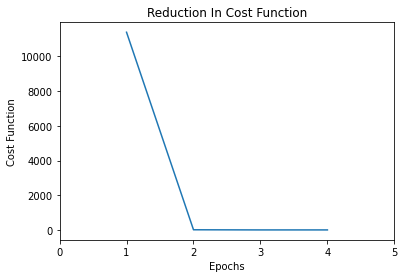

Cosine Similarity: 0.9999999999913521
Latest Cost Function Value: 5.5640014926667516e-05


In [ ]:
X, Y, Bp = generate_array(0, 10000, 10)
b, cost_function, cost= learn_parameters(X, Y, 25, 0.5, 1)
plot(cost)
print("Cosine Similarity:", cosine(b,Bp))
print("Latest Cost Function Value:", cost[-1])

**Observation -**

1. When size of data is very high and variance is very low - Value is beta is good. 

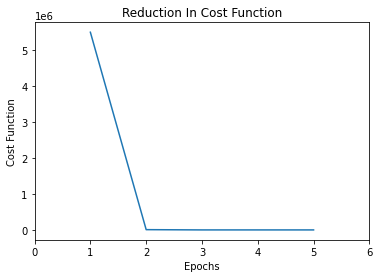

Cosine Similarity: -0.20495165698953
Latest Cost Function Value: 0.0003411802536761877


In [ ]:
X, Y, Bp = generate_array(50,10000,10)
b, cost_function, cost= learn_parameters(X, Y, 25, 0.5, 1)
plot(cost)
print("Cosine Similarity:", cosine(b,Bp))
print("Latest Cost Function Value:", cost[-1])

**Observation -**

1. When size of data is very high and variance is also very high - Value is beta is very bad. 

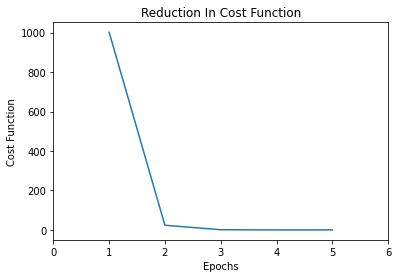

Cosine Similarity: 0.9999999127060111
Latest Cost Function Value: 0.0029959674493781527


In [ ]:
X, Y, Bp = generate_array(0,500,10)
b, cost_function, cost= learn_parameters(X, Y, 25, 0.5, 1)
plot(cost)
print("Cosine Similarity:", cosine(b,Bp))
print("Latest Cost Function Value:", cost[-1])

**Observation -**

1. When size of data is very small and variance is also very small - Value is beta is very good and value of error is good. 

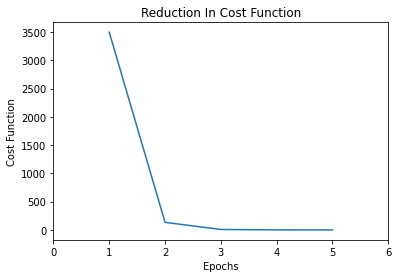

Cosine Similarity: 0.9999999127060111
Latest Cost Function Value: 0.0029959674493781527


In [ ]:
X1, Y1, Bp1 = generate_array(6,500,10)
b1, cost_function1, cost1= learn_parameters(X1, Y1, 25, 0.5, 1)
plot(cost1)
print("Cosine Similarity:", cosine(b,Bp))
print("Latest Cost Function Value:", cost[-1])

**Observation -**

1. When size of data is very large but variance is very small - Value is beta is very good and value of error is also less. 